# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**This data represents 17 campaigns.**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn.cluster import KMeans, DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [3]:
import time

In [4]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix

In [5]:
#df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [6]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
## Check for missing data
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
## replace certain column values with numeric ones
replacements = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9,\
               'oct':10, 'nov':11, 'dec':12}
bank['month'] = bank['month'].map(replacements)

In [11]:
bank[['month']].head()

,month
0,5
1,5
2,5
3,5
4,5


In [12]:
## replace certain column values with numeric ones
replacements_day = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
bank['day_of_week'] = bank['day_of_week'].map(replacements_day)

In [13]:
bank[['day_of_week']].head()

,day_of_week
0,1
1,1
2,1
3,1
4,1


In [14]:
bank[['day_of_week']].tail()

,day_of_week
41183,5
41184,5
41185,5
41186,5
41187,5


In [15]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Text(0, 0.5, '# of clients')

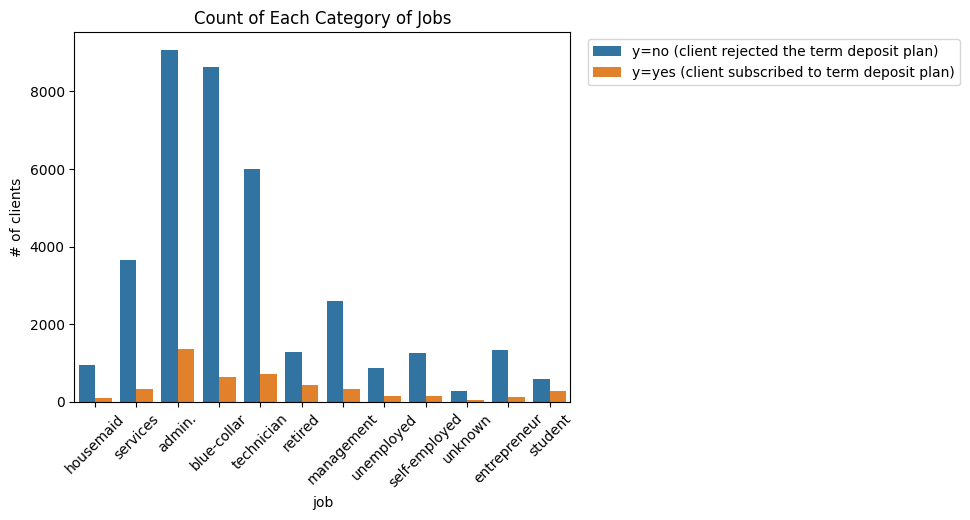

In [54]:
## Examine some of the features using plots.
## Look at 'job' first.
sns.countplot(bank, x='job', hue='y')
plt.title('Count of Each Category of Jobs')
plt.legend(labels=['y=no (client rejected the term deposit plan)','y=yes (client subscribed to term deposit plan)'], \
          bbox_to_anchor=(1.8, 1))
plt.xticks(rotation=45)
plt.ylabel('# of clients')

Text(0, 0.5, '# of clients')

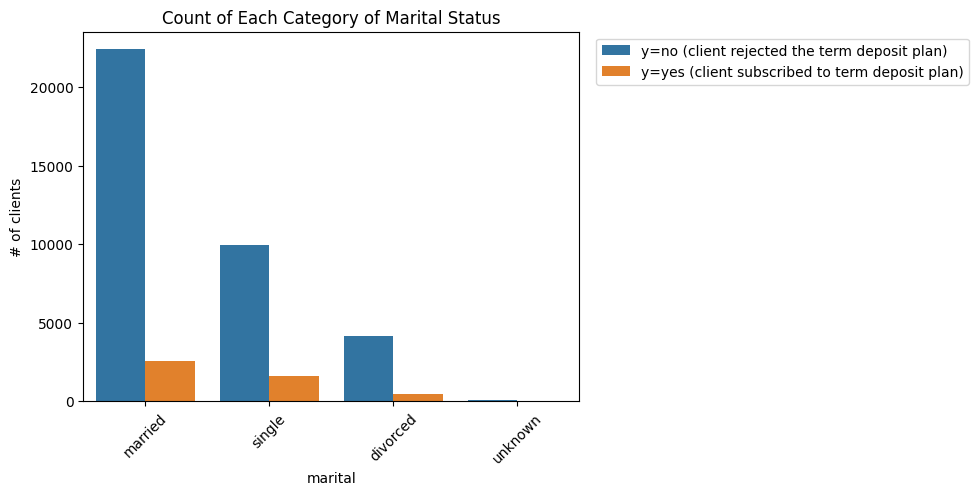

In [55]:
## Examine marital status.
sns.countplot(bank, x='marital', hue='y')
plt.title('Count of Each Category of Marital Status')
plt.legend(labels=['y=no (client rejected the term deposit plan)','y=yes (client subscribed to term deposit plan)'], \
          bbox_to_anchor=(1.8, 1))
plt.xticks(rotation=45)
plt.ylabel('# of clients')

Text(0, 0.5, '# of clients')

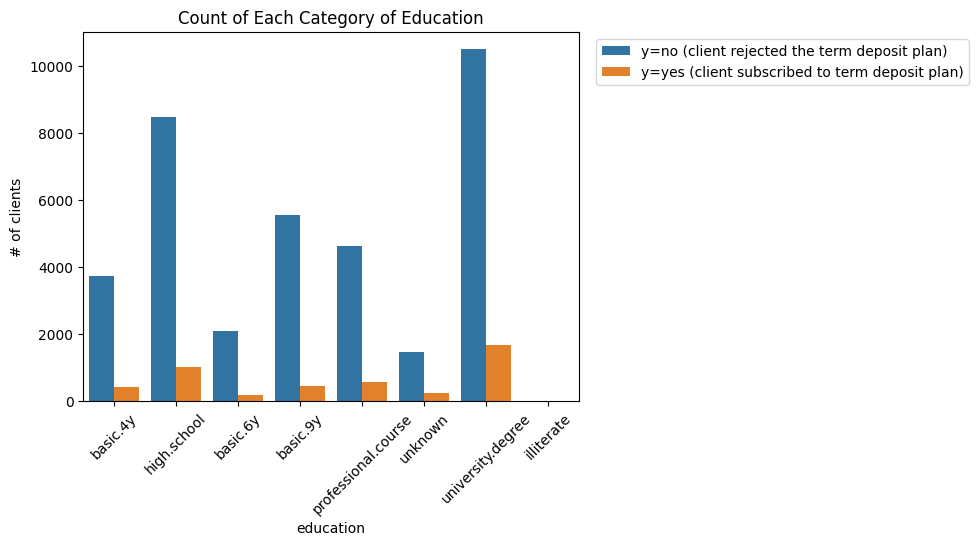

In [56]:
## Examine education.
sns.countplot(bank, x='education', hue='y')
plt.title('Count of Each Category of Education')
plt.legend(labels=['y=no (client rejected the term deposit plan)','y=yes (client subscribed to term deposit plan)'], \
          bbox_to_anchor=(1.8, 1))
plt.xticks(rotation=45)
plt.ylabel('# of clients')

Text(0, 0.5, '# of clients')

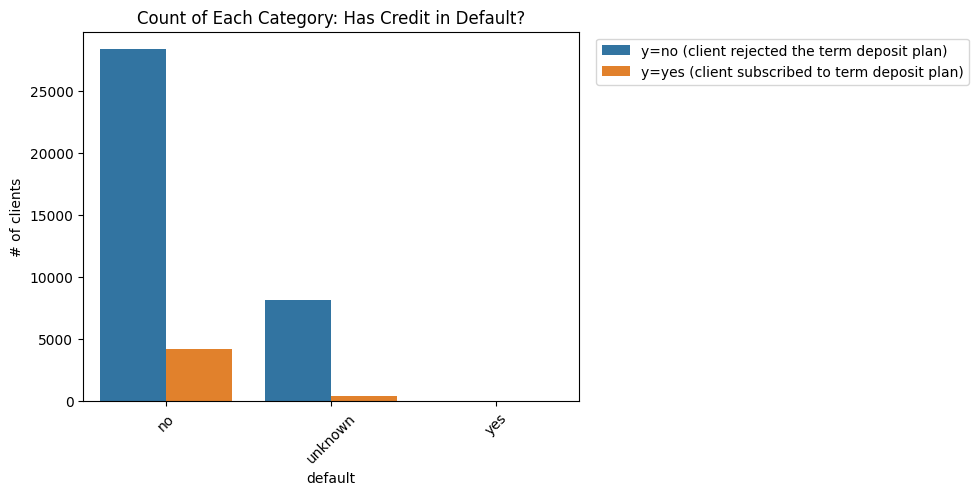

In [57]:
## Examine default status.
sns.countplot(bank, x='default', hue='y')
plt.title('Count of Each Category: Has Credit in Default?')
plt.legend(labels=['y=no (client rejected the term deposit plan)','y=yes (client subscribed to term deposit plan)'], \
          bbox_to_anchor=(1.8, 1))
plt.xticks(rotation=45)
plt.ylabel('# of clients')

Text(0, 0.5, '# of clients')

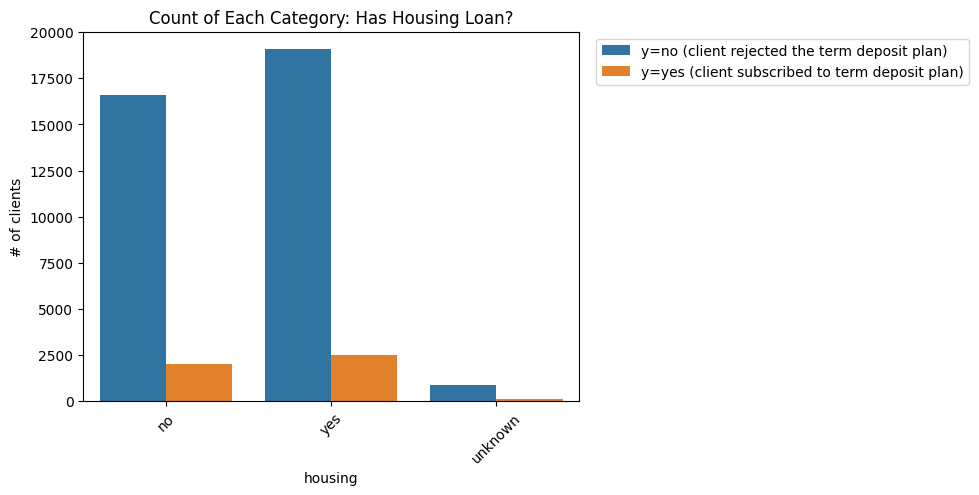

In [58]:
## Examine 'housing'.
sns.countplot(bank, x='housing', hue='y')
plt.title('Count of Each Category: Has Housing Loan?')
plt.legend(labels=['y=no (client rejected the term deposit plan)','y=yes (client subscribed to term deposit plan)'], \
          bbox_to_anchor=(1.8, 1))
plt.xticks(rotation=45)
plt.ylabel('# of clients')

Text(0, 0.5, '# of clients')

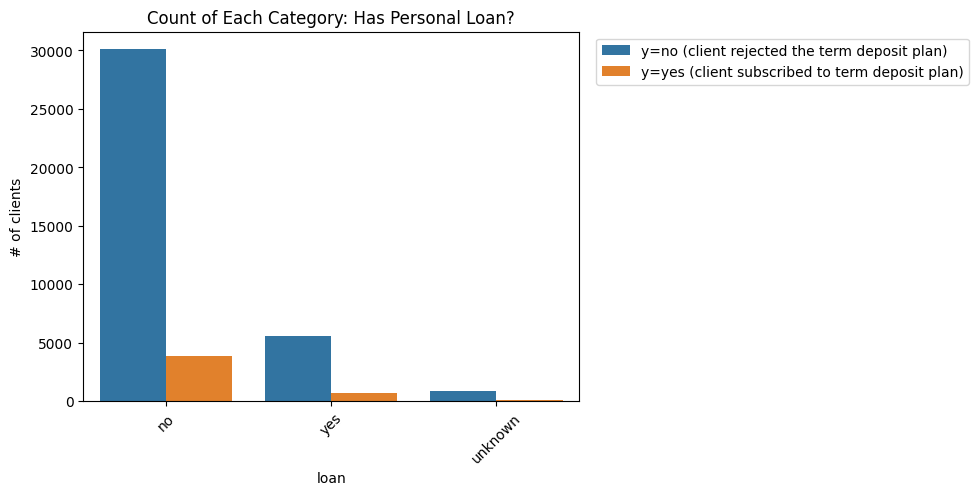

In [59]:
## Examine 'loan'.
sns.countplot(bank, x='loan', hue='y')
plt.title('Count of Each Category: Has Personal Loan?')
plt.legend(labels=['y=no (client rejected the term deposit plan)','y=yes (client subscribed to term deposit plan)'], \
          bbox_to_anchor=(1.8, 1))
plt.xticks(rotation=45)
plt.ylabel('# of clients')

**Business Problem Statement:
Many times, businesses face the issue of having to target multiple potential customers thru phone calls to each individual (potential client), and unsure whether or not that individual will buy the product being advertised.  Banks are no exception.  This data here is from a Portuguese banking institution.  The goal here is to investigate which features (characteristics of an individual) would be the most relevant for the purchasing decision, which is if a customer says "yes" or "no" to subscribing to a term deposit plan, and also creating a model that predicts what types of customers are most likely to say "yes".  Using a multi-feature predictive model is important here, since no conclusions could be drawn from the data analysis using one feature at a time as above, since most clients rejected the plan in all categories.  This will help the banks redirect their limited resources towards contacting only the customers who are more likely to subscribe.**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
## Create the features and target columns for model creation.
## Only the bank information features will be used.
X = bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
y = bank['y'] # target column

In [16]:
## Do the encoding and transformation of the features
transformer = make_column_transformer((OneHotEncoder(drop='if_binary'), ['job', 'marital', 'education', 'default', 'housing', 'loan']),\
                                     (StandardScaler(), ['age']))

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [17]:
## Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [18]:
y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [19]:
## Since majority class is "no" (client not subscribing to the plan), baseline accuracy is based on 
## predicting all samples (rows) to be not subscribing (y="no")
base_acc = 36548/(36548+4640)
print(base_acc)

0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [26]:
## Logistic regression
lgr_pipe = Pipeline([\
                    ('transformer', transformer),\
                    ('lgr', LogisticRegression())])
lgr_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('lgr', LogisticRegression())])

In [28]:
## Logistic Regression
start = time.time()
lgr_pipe.fit(X_train, y_train)
end = time.time()
lgr_tr_time = end - start
lgr_tr_time

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1676959991455078

### Problem 9: Score the Model

What is the accuracy of your model?

In [38]:
lgr_train_acc1 = lgr_pipe.score(X_train, y_train)
lgr_train_acc1

0.8873434844438278

In [39]:
lgr_test_acc1 = lgr_pipe.score(X_test, y_test)
lgr_test_acc1

0.8873512988589464

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [40]:
#KNN
knn_pipe = Pipeline([\
                    ('transformer', transformer),\
                    ('knn', KNeighborsClassifier())])

start = time.time()
knn_pipe.fit(X_train, y_train)
end = time.time()
knn_tr_time = end - start
print(f"KNN train time = {knn_tr_time}")

knn_train_acc1 = knn_pipe.score(X_train, y_train)
print(f"KNN train accuracy = {knn_train_acc1}")

knn_test_acc1 = knn_pipe.score(X_test, y_test)
print(f"KNN test accuracy = {knn_test_acc1}")

KNN train time = 0.08214783668518066
KNN train accuracy = 0.8915750407547431
KNN test accuracy = 0.8774783523508942


In [41]:
#Decision Tree
dtree_pipe = Pipeline([\
                    ('transformer', transformer),\
                    ('dtree', DecisionTreeClassifier())])

start = time.time()
dtree_pipe.fit(X_train, y_train)
end = time.time()
dtree_tr_time = end - start
print(f"Decision Tree train time = {dtree_tr_time}")

dtree_train_acc1 = dtree_pipe.score(X_train, y_train)
print(f"Decision Tree train accuracy = {dtree_train_acc1}")

dtree_test_acc1 = dtree_pipe.score(X_test, y_test)
print(f"Decision Tree test accuracy = {dtree_test_acc1}")

Decision Tree train time = 0.29083991050720215
Decision Tree train accuracy = 0.9188373625611321
Decision Tree test accuracy = 0.8644492999919074


In [42]:
#SVC (Support Vector Classifier), or SVM (Support Vector Machine)
svc_pipe = Pipeline([\
                    ('transformer', transformer),\
                    ('svc', SVC())])

start = time.time()
svc_pipe.fit(X_train, y_train)
end = time.time()
svc_tr_time = end - start
print(f"SVC train time = {svc_tr_time}")

svc_train_acc1 = svc_pipe.score(X_train, y_train)
print(f"SVC train accuracy = {svc_train_acc1}")

svc_test_acc1 = svc_pipe.score(X_test, y_test)
print(f"SVC test accuracy = {svc_test_acc1}")

SVC train time = 25.766337871551514
SVC train accuracy = 0.8882106066386876
SVC test accuracy = 0.886784818321599


In [43]:
## create dataframe of all the results
models = ['LogisticRegression', 'KNN', 'DecisionTree', 'SVM'] 

lgr_tr_time = round(lgr_tr_time, 4)
knn_tr_time = round(knn_tr_time, 4)
dtree_tr_time = round(dtree_tr_time, 4)
svc_tr_time = round(svc_tr_time, 4)
train_times = [lgr_tr_time, knn_tr_time, dtree_tr_time, svc_tr_time]

lgr_train_acc1 = round(lgr_train_acc1, 2)
knn_train_acc1 = round(knn_train_acc1, 2)
dtree_train_acc1 = round(dtree_train_acc1, 2)
svc_train_acc1 = round(svc_train_acc1, 2)
train_accs = [lgr_train_acc1, knn_train_acc1, dtree_train_acc1, svc_train_acc1]

lgr_test_acc1 = round(lgr_test_acc1, 2)
knn_test_acc1 = round(knn_test_acc1, 2)
dtree_test_acc1 = round(dtree_test_acc1, 2)
svc_test_acc1 = round(svc_test_acc1, 2)
test_accs = [lgr_test_acc1, knn_test_acc1, dtree_test_acc1, svc_test_acc1]

results_dict1 = {'Model': models, 'Train Time': train_times, 'Train Accuracy': train_accs, 'Test Accuracy': test_accs}
results_df1 = pd.DataFrame(results_dict1)
results_df1

,Model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression,0.1677,0.89,0.89
1,KNN,0.0821,0.89,0.88
2,DecisionTree,0.2908,0.92,0.86
3,SVM,25.7663,0.89,0.89


Here is the summary of results from the above table:
* KNN has the fastest train time while SVM has the slowest.
* None of these models have test accuracy greater than the baseline accuracy of 0.89.
* There is some overfitting in Decision Tree model, where test accuracy is less than train accuracy.

Next steps would be:
* Look at other performance metrics such as precision and recall.
* Explore more features.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [46]:
## Precision and recall scores using only the first 7 features
recall_score(y_test, dtree_pipe.predict(X_test), pos_label='yes')

0.08836206896551724

In [47]:
## Precision and recall scores using only the first 7 features
precision_score(y_test, dtree_pipe.predict(X_test), pos_label='yes')

0.23251417769376181

In [50]:
## Precision and recall scores using only the first 7 features
recall_score(y_test, svc_pipe.predict(X_test), pos_label='yes')

0.008620689655172414

In [51]:
## Precision and recall scores using only the first 7 features
precision_score(y_test, svc_pipe.predict(X_test), pos_label='yes')

0.3870967741935484

In [52]:
## Precision and recall scores using only the first 7 features
recall_score(y_test, lgr_pipe.predict(X_test), pos_label='yes')

0.0

In [53]:
## Precision and recall scores using only the first 7 features
precision_score(y_test, lgr_pipe.predict(X_test), pos_label='yes')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [54]:
## Precision and recall scores using only the first 7 features
recall_score(y_test, knn_pipe.predict(X_test), pos_label='yes')

0.07183908045977011

In [55]:
## Precision and recall scores using only the first 7 features
precision_score(y_test, knn_pipe.predict(X_test), pos_label='yes')

0.3105590062111801

In [17]:
## Create the features and target columns for model creation.
## Try all features, except for duration since this is unknown before the call is made.
X2 = bank.drop(['duration', 'y'], axis=1)
y = bank['y'] # target column

In [18]:
X2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [19]:
## Do the encoding and transformation of the features
transformer2 = make_column_transformer((OneHotEncoder(drop='if_binary'), ['job', 'marital', 'education', 'default', 'housing', 'loan',\
                                                                         'contact', 'poutcome']),\
                                       remainder=StandardScaler())

In [20]:
## Split data into training and testing set
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
## Logistic regression (using all features except 'duration')
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
lgr_pipe = Pipeline([\
                    ('transformer', transformer2),\
                    ('selector', extractor),\
                    ('lgr', LogisticRegression(solver='liblinear', random_state=42))])
lgr_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [22]:
#lgr_params = {"lgr__C": np.logspace(-3,3,20), "lgr__penalty":["l1", "l2"]}
lgr_params = {"lgr__C": np.logspace(-3,3,20)}
lgr_grid = GridSearchCV(lgr_pipe, param_grid=lgr_params)
lgr_grid.fit(X2_train, y_train)
lgr_grid.best_params_

{'lgr__C': 0.018329807108324356}

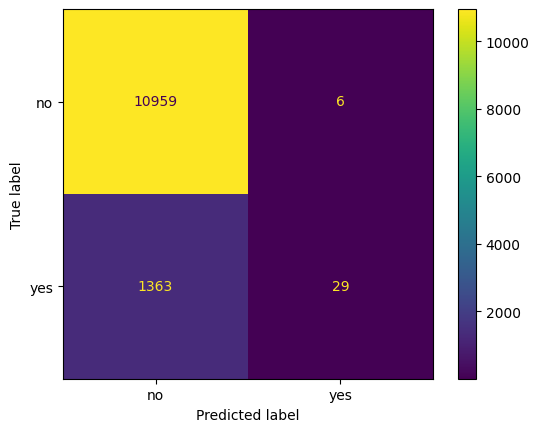

In [23]:
## Consider the probability of 'No' > 20% to be a 'No'
## Goal is to improve precision since we want to reduce the false positives.
## We don't want to predict client purchasing the plan but then not purchasing it.
predictMatrix = lgr_grid.predict_proba(X2_test)
y_pred20 = np.where(predictMatrix[:, 0] > 0.2, 'no', 'yes')
cm20 = confusion_matrix(y_test, y_pred20)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm20, display_labels=['no', 'yes'])
cm_plot.plot()
plt.show()

## Confusion matrix for Logistic Regression below

In [24]:
#precision_score(y_test, lgr_grid.predict(X2_test), pos_label='yes')
lgr_precision2 = precision_score(y_test, y_pred20, pos_label='yes')
lgr_precision2

0.8285714285714286

In [25]:
#recall_score(y_test, lgr_grid.predict(X2_test), pos_label='yes')
lgr_recall2 = recall_score(y_test, y_pred20, pos_label='yes')
lgr_recall2

0.020833333333333332

In [26]:
lgr_test_acc2 = accuracy_score(y_test, y_pred20)
lgr_test_acc2

0.8892125920530873

In [27]:
## Get model from best estimator
lgr_estimator = lgr_grid.best_estimator_
model = lgr_estimator.named_steps['lgr']
model

LogisticRegression(C=0.018329807108324356, random_state=42, solver='liblinear')

In [28]:
## Next few lines of code will be to find out which features got selected using SelectFromModel
coefs = model.coef_[0]
trans1 = lgr_estimator.named_steps['transformer']
features1 = trans1.get_feature_names_out()
sel1 = lgr_estimator.named_steps['selector']

features2 = sel1.get_feature_names_out(input_features=features1)
features3 = []
for f in features2:
    f3 = f.split('__')[1]
    features3.append(f3)

In [29]:
## Create a dataframe of model coefficients for each feature (Logistic Regression)
coef_dict = {'feature': features3, 'coefs': coefs}
coef_df = pd.DataFrame(coef_dict)
#coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by='coefs', ascending=False)
coef_df

,feature,coefs
34,cons.price.idx,0.423281
5,job_retired,0.202870
35,cons.conf.idx,0.186356
8,job_student,0.084020
29,day_of_week,0.052321
27,age,0.041614
12,marital_unknown,0.041201
16,education_illiterate,0.030486
9,job_unemployed,-0.021163
19,education_unknown,-0.022472


In [30]:
bank['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

Text(0, 0.5, '# of clients')

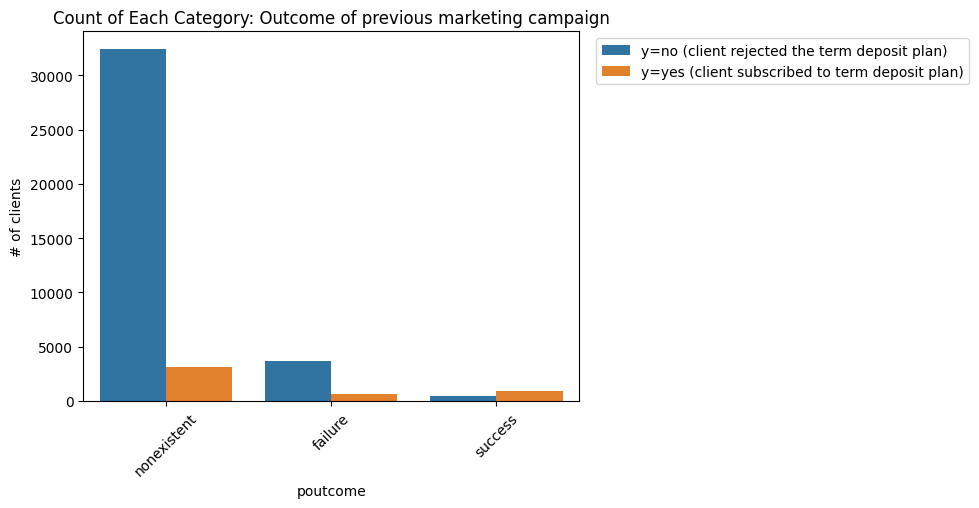

In [31]:
## Examine 'poutcome'.
sns.countplot(bank, x='poutcome', hue='y')
plt.title('Count of Each Category: Outcome of previous marketing campaign')
plt.legend(labels=['y=no (client rejected the term deposit plan)','y=yes (client subscribed to term deposit plan)'], \
          bbox_to_anchor=(1.8, 1))
plt.xticks(rotation=45)
plt.ylabel('# of clients')

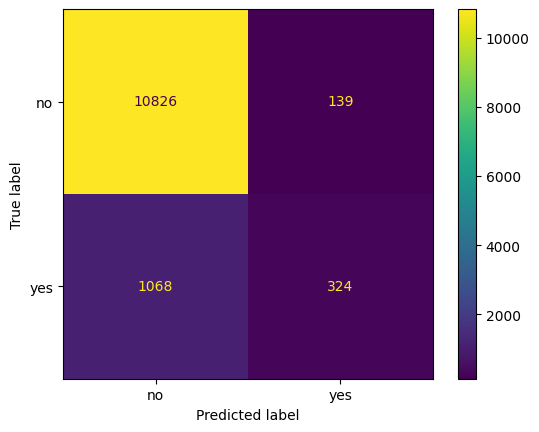

In [32]:
from sklearn.metrics import make_scorer
## SVC (using all features except 'duration')
## Here, using only the default hyperparameters/settings since SVC takes very long time to train.  
## We are not going to use grid search here.
svc_pipe = Pipeline([\
                    ('transformer', transformer2),\
                    ('svc', SVC(random_state=42))])
svc_pipe.fit(X2_train, y_train)
cm_svc = confusion_matrix(y_test, svc_pipe.predict(X2_test))
cm_svc_plot = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['no', 'yes'])
cm_svc_plot.plot()
plt.show()

## Confusion matrix for SVC below

In [33]:
#precision_score (using all features except 'duration')
svc_precision2 = precision_score(y_test, svc_pipe.predict(X2_test), pos_label='yes')
svc_precision2

0.6997840172786177

In [34]:
## Test accuracy for SVC (using all features except 'duration')
svc_test_acc2 = accuracy_score(y_test, svc_pipe.predict(X2_test))
svc_test_acc2

0.9023225702031238

In [35]:
## Decision tree (using all features except 'duration')
dtree_pipe = Pipeline([\
                    ('transformer', transformer2),\
                    ('dtree', DecisionTreeClassifier(random_state=42))])
custom_scorer = make_scorer(precision_score, greater_is_better=True,  pos_label='yes')
dtree_params = {'dtree__max_depth': list(range(1,31))}
dtree_grid = GridSearchCV(dtree_pipe, param_grid=dtree_params, scoring=custom_scorer)
dtree_grid.fit(X2_train, y_train)
dtree_grid.best_params_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Librar

{'dtree__max_depth': 2}

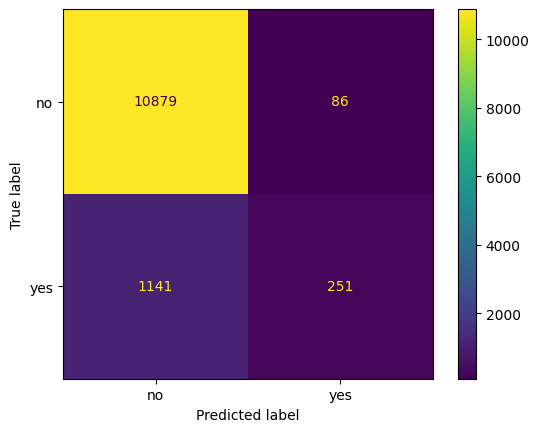

In [36]:
## Decision Tree (using all features except 'duration')
cm_dtree = confusion_matrix(y_test, dtree_grid.predict(X2_test))
cm_dtree_plot = ConfusionMatrixDisplay(confusion_matrix=cm_dtree, display_labels=['no', 'yes'])
cm_dtree_plot.plot()
plt.show()

## Confusion matrix for Decision Tree below

In [37]:
## Precision for Decision Tree (using all features except 'duration')
dtree_precision2 = precision_score(y_test, dtree_grid.predict(X2_test), pos_label='yes')
dtree_precision2

0.744807121661721

In [38]:
## Test accuracy for Decision Tree (using all features except 'duration')
dtree_test_acc2 = accuracy_score(y_test, dtree_grid.predict(X2_test))
dtree_test_acc2

0.9007040543821316

knn_grid.best_params_:
{'knn__n_neighbors': 31}


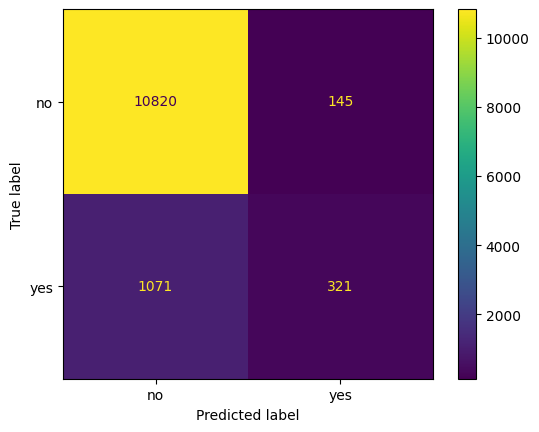

In [39]:
## KNN (using all features except 'duration')
knn_pipe = Pipeline([\
                    ('transformer', transformer2),\
                    ('knn', KNeighborsClassifier())])
custom_scorer = make_scorer(precision_score, greater_is_better=True,  pos_label='yes')
knn_params = {'knn__n_neighbors': list(range(1,32,2))}
knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params, scoring=custom_scorer)
knn_grid.fit(X2_train, y_train)
print("knn_grid.best_params_:")
print(knn_grid.best_params_)

cm_knn = confusion_matrix(y_test, knn_grid.predict(X2_test))
cm_knn_plot = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['no', 'yes'])
cm_knn_plot.plot()
plt.show()

## Confusion matrix for KNN below

In [40]:
## Precision for KNN (using all features except 'duration')
knn_precision2 = precision_score(y_test, knn_grid.predict(X2_test), pos_label='yes')
knn_precision2

0.6888412017167382

In [41]:
## Test accuracy for KNN (using all features except 'duration')
knn_test_acc2 = accuracy_score(y_test, knn_grid.predict(X2_test))
knn_test_acc2

0.9015942380836772

In [42]:
## Create dataframe comparing the 4 classfication models in terms of precision and test accuracy.
## This dataframe includes all the feature columns except 'duration'.
models = ['LogisticRegression', 'DecisionTree', 'SVC', 'KNN']
test_accs = [round(lgr_test_acc2, 2), round(dtree_test_acc2, 2), round(svc_test_acc2, 2), \
             round(knn_test_acc2, 2)]
precisions = [round(lgr_precision2, 2), round(dtree_precision2, 2), round(svc_precision2, 2), \
             round(knn_precision2, 2)]
results = {'model': models, 'Test Accuracy': test_accs, 'Precision': precisions}
results_df2 = pd.DataFrame(results)
results_df2

,model,Test Accuracy,Precision
0,LogisticRegression,0.89,0.83
1,DecisionTree,0.90,0.74
2,SVC,0.90,0.70
3,KNN,0.90,0.69


**Findings (Summary & Conclusions):**
* Logistic regression has higher precision score compared to the other 3 models, which are decision tree, SVC (support vector classifier), and KNN (k-nearest neighbors).  Decision is to use logistic regression to create the predictive model.
* Precision for logistic regression has been calculated to be 0.83.
* In logistic regression, probability threshold can be adjusted to optimize for precision.
* Precision is the necesary metric to use, since we want to minimize the false predictions of customer saying "yes" (false hopes that customer will purchase term deposit plan from the bank) but the actual action is "no" (deciding not to purchase the term depost plan from the bank).
* The most important features or characteristics for the bank to investigate in order to maximize likelihood of customers deciding to subscribe to the term deposit plan are:
    *  contact: Focus on the clients where contact type is cellular instead of telephone.
    *  emp.var.rate: Focus on the clients with lower employment variation rate.
    *  poutcome: Outcome of the previous marketing campaign needs to be "success".  The plot above shows that for the previous marketing campaign of "success", majority of clients decided to subscribe to this plan.
    *  cons.price.idx: Focus on the clients with higher consumer price index.

##### Questions